### Basic CNN model with tensorflow2 keras api
In this task we will analyze basic CNN model,
layers included at this model, see how to use datasets included into tensorflow and work with them,
try to train our lenet-5 model with preprocessed dataset.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

#### 1. Model

Usually CNN model consists of groups of convolutional layers, pooling layers and sometimes includes dropout layers.

**Convolutional layers** needed for finding features on image.
First of all, image processed with using convolution matrices and create some count of result images,
same with number of convolution filters.

<img src="images/conv.gif">

**Pooling layer** is choose element from matrix of 4 pixels in this result images.
Considered maximal value is much important.
But sometimes other approaches are used, as example minimum value or average of values.

| MaxPooling | AveragePooling |
| :--:  | :--: |
| <img src="images/maxpooling.png"> | <img src="images/avgpooling.png"> |

**Dropout layer** by chance "turn off" specified percent of neurons for each learning iteration.
Dropout its industry standard regularization method for neural networks.

"Dropout makes our big network act like a little one by randomly training
little subsections of the network at a time, and little networks don't overfit." - Grokking Deep Learning, p. 154.

Why does it work?
Initial condition of neural networks selected randomly. Its mean every neural network learns differently.
Therefore, they study general patterns and various noise.
After voting, they can reject noise and only common signal stay.
Dropout makes some small neural network from one large.

<img src="images/dropout.png">

Look at Lenet-5 model

<img src="images/lenet5.png">

Lenet model consists of two cnvolutional layers, two pulling (sub-sampling), two fully connected layers and output layer.
Lenet-5 model doesn't have Dropout layer.

Lets create Lenet-5 model with previously considered layers.

In [2]:
# create new model
model = tf.keras.Sequential()

# Convolutional layer
# Basic parameters for Conv2D layer:
# - filters - number of output filters in the convolution (dimensionality of the output space)
# - kernel_size - size of convolution kernel
# - strides - strides of the convolution along the height and width
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))

# Pooling layer
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D())

# Flattern layer - A flatten operation on a tensor reshapes the tensor
# to have the shape that is equal to the number of elements contained in tensor non including the batch dimension
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

# shows model description
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

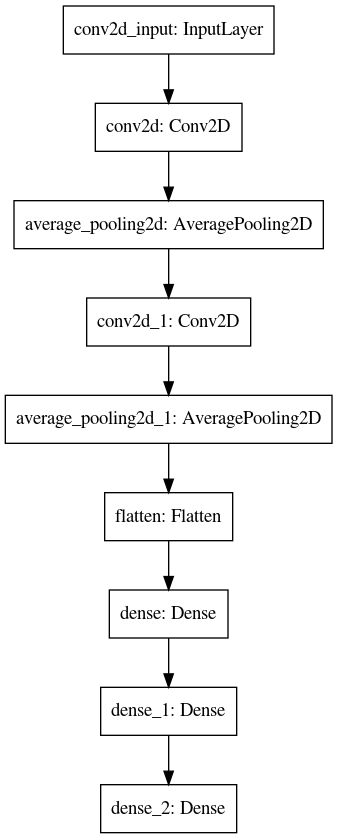

In [3]:
# Visualize model
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

#### 2. Dataset

Tensorflow included different datasets for computer vision by default. Use it if not sure in your data
and want to check the model on exactly correct data.
You can find a detailed list on the [tensorflow page](https://www.tensorflow.org/datasets/catalog/overview).

Will take Fashion MNIST dataset and try to prepare it for our lenet-5 model.

Fashion MNIST - dataset of Zalando’s article images included various types of clothes.
Fashion MNIST consisting of a training set of 60,000 examples and a test set of 10,000 examples.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.

<img src="images/fashion.png">

Lets load dataset.

In [4]:
# Loading dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

After loading dataset we have 4 numpy arrays.
train_x and train_y - arrays of images and labels for training
x_test and y_test - arrays of images and labels for testing

Lets analyze loaded data.

Image size:  (28, 28)
Label:  9


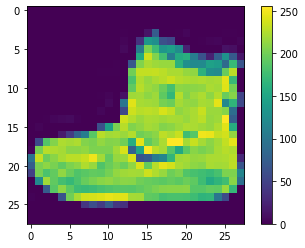

In [5]:
# take first image as example
image_example = x_train[0]
label_example = y_train[0]

# Show image example size and label example value
print("Image size: ", image_example.shape)
print("Label: ", label_example)

# Show image example
plt.figure()
plt.imshow(image_example)
plt.colorbar()
plt.grid(False)
plt.show()

For correctly training models dataset needed split onto 3 parts:
- **train dataset** - data for training model
- **validation dataset** - data for testing model throughout training process
It helps to see of correctness training process, track overfitting.
- **test dataset** - data for final test the model. Its helps to see generalization ability of model.

What we will have to do:

1. After splitting dataset scale it. Convert each image, change pixel value to 0..1. It makes training model faster.
2. Reshape images to tensorflow tensor format and resize this tensors (images) from 28x28 to 32x32 size
because lenet-5 model input image size is 32x32 pixels.
3. Reshape labels from 0..9 to vector with size 10 - tensorflow format (tensor). This method calls one-hot encoding.
This conversion needed for training model with different categories of objects.

In our dataset we have 10 classes. Each of them have number from 1 to 9.
We convert it to array where category number its element position in array:

| class number -> | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| class 0 array | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| class 1 array | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| class 2 array | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| class 3 array | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| class 4 array | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| class 5 array | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| class 6 array | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| class 7 array | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| class 8 array | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| class 9 array | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

Process the dataset for our model.

In [6]:
# divide our train data to train and validation dataset
valid_part = int(len(x_train)*0.8) # 80 persent of data
x_train, x_valid = x_train[:valid_part], x_train[valid_part:]
y_train, y_valid = y_train[:valid_part], y_train[valid_part:]

# scale our data to 0..1 (each pixel)
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape input data from (28, 28) to (28, 28, 1) - tensorflow format (tensor)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Resize data to lenet-5 input size (32x32 pixels)
w, h = 32, 32
x_train = tf.image.resize(x_train, (h, w))
x_valid = tf.image.resize(x_valid, (h, w))
x_test = tf.image.resize(x_test, (h, w))

# Reshape labels from 0..9 to vector with size 10 - tensorflow format (tensor)
# This method named One-hot encode.
y_train = tf.one_hot(y_train, 10)
y_valid = tf.one_hot(y_valid, 10)
y_test = tf.one_hot(y_test, 10)

Our data ready!

#### 3. Training

Lets look on training parameters.

**Optimizer** - Optimizer update the weights of network.
Its minimize the loss function.
Loss function acts as guides to the optimizer if it is moving in the right direction to reach the global minimum.
More about optimizers in tensorflow read on
[tensorflow page](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
or [googling](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/).

Base recommendation - use "SGD+Nesterov" for small networks and "Adam" (and other variants) or "RMSprop" for deep networks.

**Loss function** - function for estimation the loss of the model.
The weights must be updated to reduce the loss on the next evaluation.
More about loss functions in tensorflow read on
[tensorflow page](https://www.tensorflow.org/api_docs/python/tf/keras/losses) or
[MLmastery](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/).

Cross-entropy is the default loss function to use for multi-class classification problems.

**Metrics** - parameter for monitoring of training and testing model.
Choose metrics depend from task. Read more about metrics on [tensorflow page](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
or [MLmastery](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/)

Use CategoricalAccuracy for predict multi-class classification accuracy.

In [7]:
# optimizer, loss and metrics definition
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()
# Compile model with parameters defined above
model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

Train model with batch size = 64 on 30 epochs.
The batch size defines the number of samples that will be propagated through the network.
Epochs mean how much times we pass dataset through a neural network.

More about parameters on [tensorflow page](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

We not use validation_split parameter because we split our dataset before.

In [8]:
# Load train results into history variable
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_valid, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 73us/sample - loss: 0.9406 - categorical_accuracy: 0.6558 - val_loss: 0.6162 - val_categorical_accuracy: 0.7685
Epoch 2/30
48000/48000 [==============================] - 2s 40us/sample - loss: 0.5860 - categorical_accuracy: 0.7808 - val_loss: 0.5285 - val_categorical_accuracy: 0.8083
Epoch 3/30
48000/48000 [==============================] - 2s 39us/sample - loss: 0.5160 - categorical_accuracy: 0.8090 - val_loss: 0.5124 - val_categorical_accuracy: 0.8133
Epoch 4/30
48000/48000 [==============================] - 2s 39us/sample - loss: 0.4764 - categorical_accuracy: 0.8250 - val_loss: 0.4648 - val_categorical_accuracy: 0.8319
Epoch 5/30
48000/48000 [==============================] - 2s 39us/sample - loss: 0.4493 - categorical_accuracy: 0.8344 - val_loss: 0.4420 - val_categorical_accuracy: 0.8424
Epoch 6/30
48000/48000 [==============================] - 2s 39us/sample - loss: 0.42

Lets show train results.
See how model accuracy increased and loss decreased on graph.

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

Validation on test dataset have high importance because its can show real modal accuracy.
Validate our model on test data:

In [ ]:
score = model.evaluate(x_test,  y_test, verbose=0)
print('\n', 'Test accuracy:', score[1], "Test loss:", score[0])